<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'capstone_user_identification'

In [22]:
def chunker(lst, session_length, window_size, user):
    lst = list(lst)
    chunked = [lst[i:i + session_length] for i in range(0, len(lst), window_size)]
    for ch in chunked:
        yield [' '.join(ch)] + [user]

def prepare_train_set(path_to_csv_files, session_length=10, window_size=10):
    user_files = glob('{}/*.csv'.format(path_to_csv_files), recursive=True)
    df_as_records = []
    for file in user_files:
        df_user = pd.read_csv(file)
        user_name = file.split('.')[0].split('\\')[-1]
        chunked = chunker(df_user.site, session_length, window_size, user_name)
        df_as_records.extend(chunked)
    df = pd.DataFrame.from_records(df_as_records)
    return df

def to_counting(X):
    vectorizer = CountVectorizer(tokenizer=lambda s: s.split(), analyzer='word')
    X, y = X.iloc[:,0].values, X.iloc[:,1].values
    X = vectorizer.fit_transform(X)
#     print(vectorizer.vocabulary_)
    return X, y

In [39]:
def prepare_sparse_train_set_window(path_to_csv_files, 
                                    session_length=10, window_size=10):
    return to_counting(prepare_train_set(path_to_csv_files, session_length, window_size))

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [42]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'),
                                       session_length=5, window_size=3)

In [43]:
X_toy_s5_w3.todense()

matrix([[0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0],
        [1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0],
        [0, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [44]:
y_s5_w3

array(['user0001', 'user0001', 'user0001', 'user0001', 'user0001',
       'user0002', 'user0002', 'user0003', 'user0003', 'user0003',
       'user0003', 'user0003'], dtype=object)

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [45]:
%%time
import itertools

data_lengths = []

for num_users in tqdm_notebook([10, 150]):
    for window_size, session_length in tqdm_notebook(itertools.product([10, 7, 5], [15, 10, 7, 5])):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'{}users'.format(num_users)),
                                                           session_length, window_size)
            data_lengths.append(X_sparse.shape[0])
            
            with open(os.path.join(PATH_TO_DATA, 
                    'X_sparse_{}users_s{}_w{}.pkl'.format(
                        num_users, session_length, window_size)), 'wb') as X_pkl:
                pickle.dump(X_sparse, X_pkl, protocol=2)
            with open(os.path.join(PATH_TO_DATA, 
                    'y_{}users_s{}_w{}.pkl'.format(
                        num_users, session_length, window_size)), 'wb') as y_pkl:
                pickle.dump(y, y_pkl, protocol=2)

HBox(children=(IntProgress(value=0, max=2), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))


Wall time: 26.7 s


**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [46]:
len(set(data_lengths))

6

In [47]:
with open('ans1.txt', 'w') as f:
    f.write(' '.join(map(str, data_lengths)))

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [48]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [49]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10
session_id,,,,,,,,,,,
0,1,2,3,4,3,3,4,3,5,3,user0031
1,6,7,8,9,3,10,11,12,13,14,user0031
2,14,4,14,14,15,16,6,17,18,14,user0031
3,19,20,19,14,14,14,14,21,22,23,user0031
4,24,14,15,25,26,27,28,29,30,29,user0031


In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
0     14061 non-null int64
1     14061 non-null int64
2     14061 non-null int64
3     14061 non-null int64
4     14061 non-null int64
5     14061 non-null int64
6     14061 non-null int64
7     14061 non-null int64
8     14061 non-null int64
9     14061 non-null int64
10    14061 non-null object
dtypes: int64(10), object(1)
memory usage: 1.3+ MB


**Распределение целевого класса:**

In [52]:
train_df['10'].value_counts()

user0128    2796
user0039    2204
user0207    1868
user0127    1712
user0237    1643
user0033    1022
user0050     802
user0031     760
user0100     720
user0241     534
Name: 10, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [53]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [54]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

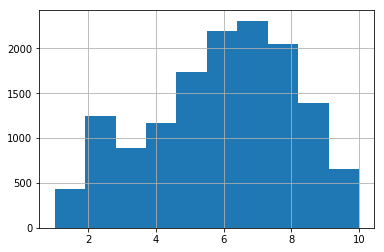

In [56]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

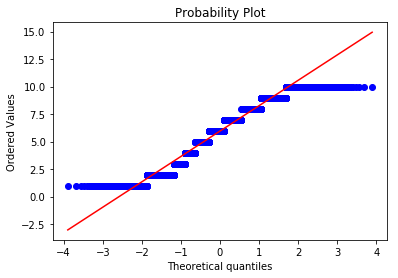

(0.9546933174133301, 0.0)

In [64]:
stats.probplot(num_unique_sites, dist="norm", plot=plt)
plt.show()
stats.shapiro(num_unique_sites)

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [65]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [84]:
pd.Series(has_two_similar).value_counts()

1    13410
0      651
dtype: int64

In [88]:
pi_val = stats.binom_test(pd.Series(has_two_similar).value_counts(), p=0.95, alternative='greater')

In [89]:
pi_val

0.02207653769072678

**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [90]:
succ = has_two_similar.sum()
nobs = len(has_two_similar)
wilson_interval = proportion_confint(succ, nobs=nobs, method='wilson')

In [91]:
print('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

0.95 0.957


**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [94]:
with open(os.path.join(PATH_TO_DATA, 'site_freq_10users.pkl'), 'rb') as f:
    site_freq_10_users = pickle.load(f)

In [112]:
site_1000_freqs = [site_freq_10_users[key][1] for key in site_freq_10_users if site_freq_10_users[key][1] >= 1000]
site_1000_ids = [site_freq_10_users[key][0] for key in site_freq_10_users if site_freq_10_users[key][1] >= 1000]

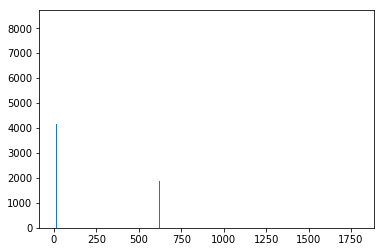

In [113]:
plt.bar(site_1000_ids, site_1000_freqs)
plt.show()

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [151]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    data = np.array(data)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
#     print(indices)
    samples = data[indices]
    return samples

In [152]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [153]:
site_freqs = sorted([site_freq_10_users[key][1] for key in site_freq_10_users], reverse=True)
n_samples = len(site_freq_10_users.keys())
samples = get_bootstrap_samples(site_freqs, n_samples, random_seed=17)

In [154]:
samples.shape

(4913, 4913)

In [155]:
stat_intervals(samples.mean(1), 0.05)

array([22.51524527, 35.76303684])

## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.